# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [4]:


import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import histogram
from matplotlib.pyplot import bar
from skimage.color import rgb2gray,rgb2hsv,rgb2grey

# Convolution:
from scipy.signal import convolve2d
from scipy import fftpack
import math

from skimage.util import random_noise
from skimage.filters import median
from skimage.feature import canny



# Edges
from skimage.filters import sobel_h, sobel, sobel_v,roberts, prewitt

# Show the figures / plots inside the notebook
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 


def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)
    
    bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')


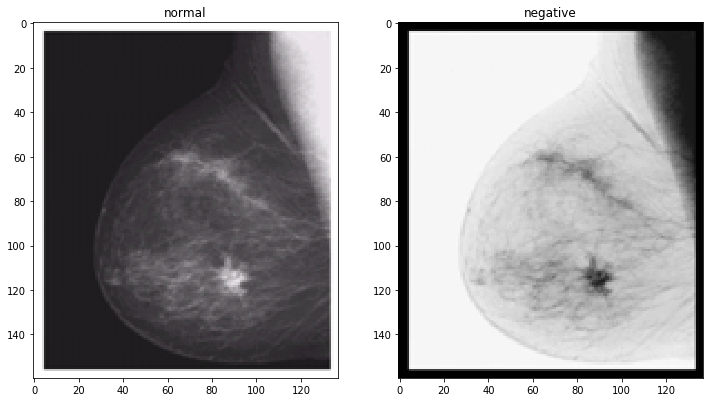

In [61]:
'''
1
Negative Transformation
'''
def NegativeTransformation (img):
#    print(img)
    for i in range (img.shape[0]) :
        for j in range (img.shape[1]):
            
        
            img[i][j]=255.-img[i][j]
    return img 
img=io.imread("Picture1.png")

imgGray=rgb2gray(img)
negativeImage=NegativeTransformation(imgGray)
#print(negativeImage)
show_images([img,negativeImage],['normal','negative'])

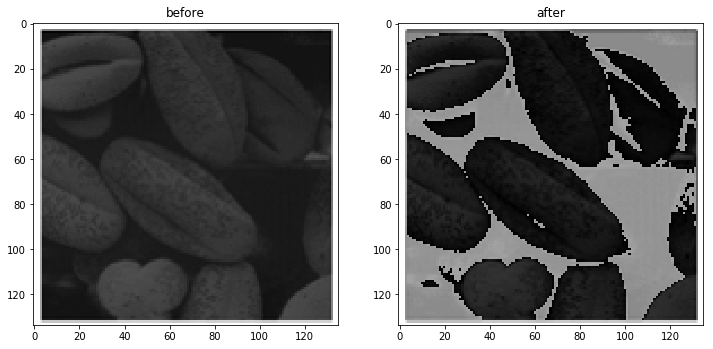

In [24]:
'''
2
Contrast Enhancement
'''
from skimage import exposure
def ContrastEnhancement(img,minInp,maxInp,minOut,maxOut):
    #print(img[0][0])
        imgCopy=np.copy(img)
        for i in range (imgCopy.shape[0]):
            for j in range (imgCopy.shape[1]):
                if minInp<imgCopy[i][j]<maxInp:
                    imgCopy[i][j]=(imgCopy[i][j]+minInp)*((maxOut-minOut)/maxInp-minInp)+minOut
        return imgCopy    
img=io.imread("Picture2.png")
imgGray=rgb2grey(img)
imgOut=ContrastEnhancement(imgGray*255,0,100,50,200)
show_images([imgGray,imgOut],["before","after"])

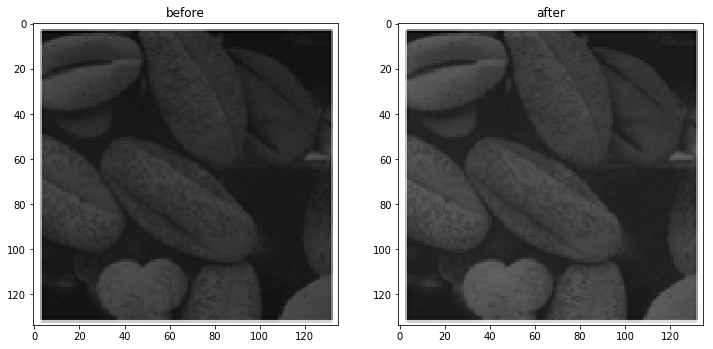

In [27]:
'''
3
Gamma Correction
'''
def GammaCorrection(img,c,alpha):
    imgCopy=np.copy(img)
    for i in range (imgCopy.shape[0]):
        for j in range(imgCopy.shape[1]):
            imgCopy[i][j]=c*((imgCopy[i][j]*255)**alpha)
    return imgCopy

img=io.imread('Picture2.png')
imgGray=rgb2gray(img)
imgOut=GammaCorrection(imgGray,1,0.5)
show_images([imgGray,imgOut],["before","after"])
#on decreasing the alpha the photo brightnes increase 

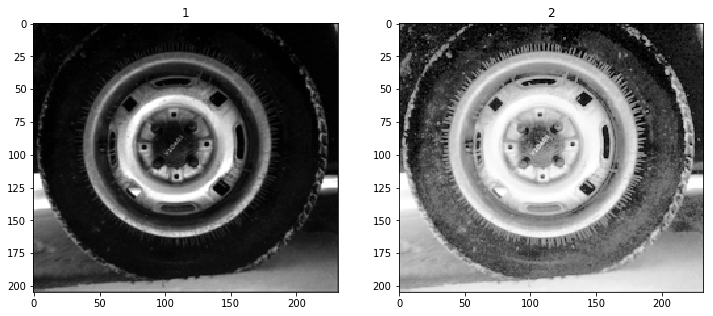

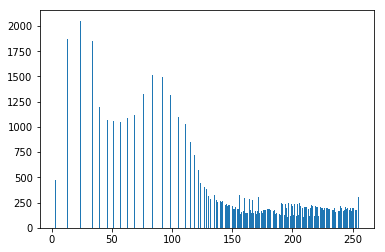

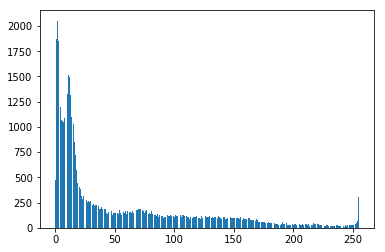

In [28]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(img):
#def getImageWithHist(name,ext,nbins=256):
    Histogram=np.zeros(256)
    imgCopy=np.copy(img)
    for  i in range (imgCopy.shape[0]):
        for  j in range (imgCopy.shape[1]):
            Histogram[(imgCopy[i][j]).astype(int)]=Histogram[(imgCopy[i][j]).astype(int)]+1
    cumHistogram=np.zeros(256)
    cumHistogram[0]=Histogram[0]
    for  i in range (Histogram.shape[0]):
        if(i==0):
            continue
        cumHistogram[i]=cumHistogram[i-1]+Histogram[i]         
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            imgCopy[i][j]=np.round(255*cumHistogram[(img[i][j]).astype(int)]/(imgCopy.shape[0]*imgCopy.shape[1]))
    return imgCopy


img=io.imread('tire.tif')
imgGray=rgb2gray(img)
out=getImageWithHist((imgGray))
show_images([imgGray,out],["1","2"])
showHist(out)
showHist(imgGray)

